In [1312]:
import pandas as pd
import numpy as np
from pathlib import Path
import random
from matplotlib import pyplot as plt
import re
import glob

In [1313]:
def map_columns(raw_input_df):
    column_mapping = {}
    for c in raw_input_df.columns:
        if c in column_mapping:
            continue
        m = re.match(r'^[A-Z]_(\w+)$', c)
        if m is None:
            raise RuntimeError('Unsupported column name format {}. You will have to map the column manually.'.format(c))
        if m[1] == 'prod_power':
            column_mapping[c] = 'exp_power'
        else:
            column_mapping[c] = m[1]
    input_df = raw_input_df.rename(columns=column_mapping)
    return input_df

In [2572]:
path = random.choice(glob.glob('../../data/refit/house_21_300s.hdf'))
print(path)
input_df = pd.read_hdf(path)
input_df = map_columns(input_df)
machine = ['dishwasher_power', 'washing_machine_power', 'tumble_dryer_power'][2]
print(machine)
machine_series = input_df[machine]

../../data/refit/house_21_300s.hdf
tumble_dryer_power


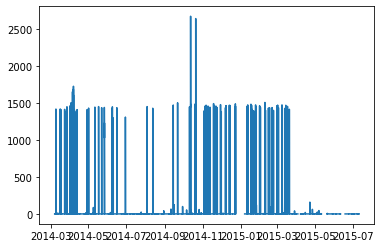

In [2573]:
plt.plot(machine_series);

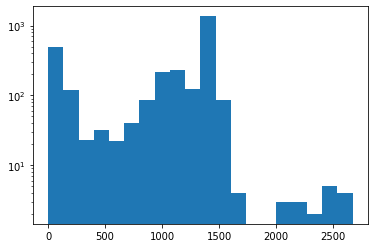

In [2574]:
plt.hist(machine_series[machine_series > 0], log=True, bins=20);

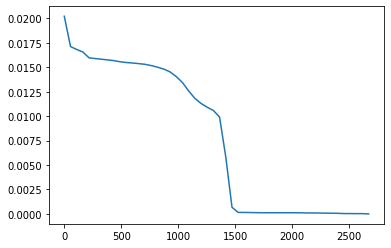

In [2575]:
thresholds = np.linspace(0, machine_series.max())
plt.plot(
    thresholds,
    [(machine_series > t).mean() for t in thresholds],
);

/home/philippe/src/git.ihomelab.ch/SccerPhase2/load-shifting-potential/.venv/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/philippe/src/git.ihomelab.ch/SccerPhase2/load-shifting-potential/.venv/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


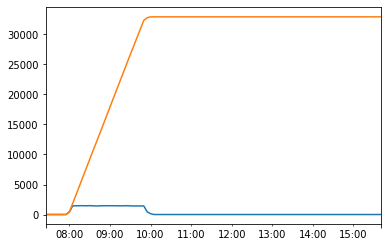

In [2606]:
def random_window(df, window_size):
    i = random.randrange(len(df) - window_size)
    return df.iloc[i:i + window_size]

while True:
    sample_series = random_window(machine_series, 100)
    if sample_series.sum() < 50:
        continue
    sample_series.plot();
    sample_series.cumsum().plot();
    break